[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/02%20Análisis%20Estadístico%20de%20Datos/notebooks/exercises/5_Practica_MC.ipynb)

----

<h1><center>Monte Carlo</center></h1>
    
    
El algoritmo se basa en el muestreo aleatorio repetido en un intento de determinar la probabilidad. Esto significa simular un evento con entradas aleatorias un gran número de veces para obtener su estimación.
    
Las simulaciones Monte Carlo se pueden utilizar en una amplia gama de campos que van desde la economía, el juego, la ingeniería, la energía y cualquier otro campo intermedio. Por lo tanto, no importa en qué campo profesional se encuentre, es algo excelente que debe conocer.

---

Al aprender a construir simulaciones Monte Carlo, es mejor comenzar con un modelo básico para comprender los fundamentos. La forma más fácil y común de hacerlo es con juegos simples, por lo que utilizaremos un juego de dados en este caso.

Probablemente haya escuchado el dicho, "la casa siempre gana", así que para este ejemplo, la casa (típicamente un casino) tendrá una ventaja, y mostraremos lo que eso significa para las posibles ganancias del jugador.



## El juego de dados

Nuestro juego simple involucrará dos dados de seis caras.

Para ganar, el jugador debe sacar el mismo número en ambos dados.

Un dado de seis caras tiene seis resultados posibles (1, 2, 3, 4, 5 y 6). Con dos dados, ahora hay 36 resultados posibles (1 y 1, 1 y 2, 1 y 3, etc., o 6 x 6 = 36 posibilidades).

En este juego, la casa tiene más oportunidades de ganar (30 resultados frente a los 6 resultados del jugador), lo que significa que la casa tiene bastante ventaja.

---

Digamos que nuestro jugador comienza con un saldo de 1,000 y está preparado para perderlo todo, por lo que apuesta 1 en cada tirada (lo que significa que se tiran ambos dados) y decide jugar 1,000 tiradas. Debido a que la casa es tan generosa, ofrecen pagar 4 veces la apuesta del jugador cuando el jugador gana.

Por ejemplo, si el jugador gana la primera tirada, su saldo aumenta en $4 y finaliza la ronda con un saldo de 1,004. Si milagrosamente lograban una racha de 1000 victorias, podrían irse a casa con 5000. Si perdía todas las rondas, podrían irse a casa sin nada. No es una mala relación riesgo-recompensa… o tal vez lo sea.

In [1]:
# Importando paqueterias
import matplotlib.pyplot as plt
import random

Ahora, debemos definir nuestra función que genere valores entre 1 y 6 para ambos dados. Podemos auxiliarnos con la funcion *random.randinit()*

Tomando en consideración la condición de que si el dado 1 es identico al dado 2, tendremos un resultado positivo en la apuesta, caso contrario, tendremos una derrota.

In [2]:
# Función para lanzar dos dados y verificar si son iguales
def roll_dice():
    die1 = random.randint(1, 6)
    die2 = random.randint(1, 6)
    same_num = die1 == die2
    return same_num

Cada simulación Monte Carlo requerirá que sepa cuáles son sus entradas y qué información está buscando obtener.

En esta práctica, ya definimos cuáles son nuestras entradas cuando describimos el juego. **Dijimos que nuestra cantidad de tiradas por juego es 1,000, y la cantidad que el jugador apostará en cada tirada es $1**.

Además de nuestras variables de entrada, necesitamos definir cuántas veces queremos simular el juego. Podemos usar la variable num_simulations como nuestro conteo de simulación de Monte Carlo. Cuanto más alto hagamos este número, más precisa será la probabilidad predicha de su valor real.

La cantidad de variables que podemos rastrear generalmente aumenta con la complejidad de un proyecto, por lo que es importante precisar sobre qué información deseamos trabajar.

Para este caso, realizaremos un seguimiento de la probabilidad de ganar (ganancias por juego divididas por el número total de tiradas) y el saldo final para cada simulación (o juego). Estos se inicializan como listas y se actualizarán al final de cada juego.

In [3]:
# Entradas
num_simulations = 10000
max_num_rolls = 1000
bet = 1

# Seguimiento
win_probability = []
end_balance = []

### Configuración de la figura

El siguiente paso es configurar nuestra figura antes de ejecutar la simulación. Al hacer esto antes de la simulación, nos permite agregar líneas a nuestra figura después de cada juego. Luego, una vez que hayamos ejecutado todas las simulaciones, podemos mostrar la gráfica para mostrar nuestros resultados. Tu ejercicio aquí es replicar la imagen (sin información dentro), con el nombre del título, ejes y ticks.

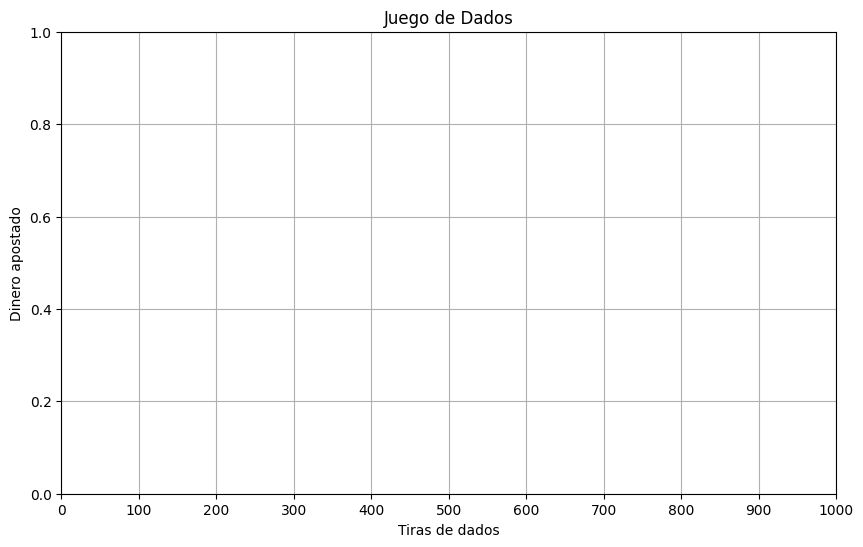

In [6]:
# Configuración de la figura
fig = plt.figure(figsize=(10, 6))
plt.title('Juego de Dados')
plt.xlabel('Tiras de dados')
plt.ylabel('Dinero apostado')
plt.xticks(range(0, max_num_rolls + 1, 100))
plt.xlim(0, max_num_rolls)
plt.grid(True)

En el siguiente código, tenemos un bucle for externo que itera a través de nuestro número predefinido de simulaciones (10 000 simulaciones) y un bucle while anidado que ejecuta cada juego (1000 tiradas).

Antes de comenzar cada ciclo while, inicializamos el saldo del jugador como $1,000 (como una lista para fines de trazado) y un conteo de tiradas y ganancias.

    * Nuestro bucle while simulará el juego durante 1000 tiradas. Dentro de este bucle, lanzamos los dados y usamos la variable booleana devuelta por roll_dice() para determinar el resultado. Si los dados son del mismo número, agregamos 4 veces la apuesta a la lista de saldo y agregamos una ganancia al conteo de ganancias. Si los dados son diferentes, restamos la apuesta de la lista de saldo. Al final de cada lanzamiento, agregamos un conteo a nuestra lista num_rolls.

Una vez que el número de lanzamientos llega a 1000, podemos calcular la probabilidad de ganar del jugador como el número de ganancias dividido por el número total de lanzamientos.

También podemos almacenar el saldo final del juego completo en la variable de seguimiento end_balance. Finalmente, podemos trazar las variables num_rolls y balance para agregar una línea a la figura que definimos anteriormente.

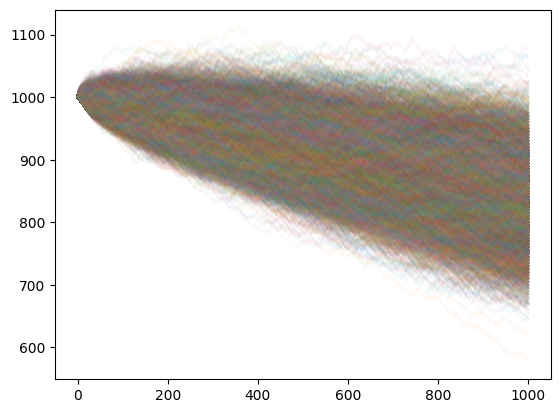

In [8]:
# Simulaciones Monte Carlo
for i in range(num_simulations):
    balance = [1000]
    num_rolls = [0]
    num_wins = 0

    while num_rolls[-1] < max_num_rolls:
        if roll_dice():
          balance.append(balance[-1] + 4 * bet)
          num_wins += 1
        else:
          balance.append(balance[-1] - bet)
        num_rolls.append(num_rolls[-1] + 1)

    win_probability.append(num_wins / max_num_rolls)
    end_balance.append(balance[-1])
    plt.plot(num_rolls, balance, alpha=0.05)

In [9]:
# Promedio general
overall_win_probability = sum(win_probability) / num_simulations
overall_end_balance = sum(end_balance) / num_simulations

print("Promedio de victorias después de", num_simulations, "simulaciones:", overall_win_probability)
print("Saldo promedio después de", num_simulations, "simulaciones:", overall_end_balance)

Promedio de victorias después de 10000 simulaciones: 0.33333419999999697
Saldo promedio después de 10000 simulaciones: 1666.671


## Desafío Complementario

¡Ahora es tu turno de llevar este experimento un paso más allá!

### Parte 1: Variación en número de lanzamientos y simulaciones

Repite la simulación del juego modificando los siguientes parámetros:

- Número de **lanzamientos por juego**: 10, 100, 1000 y 10,000
- Número de **simulaciones**: 200, 2000 y 20,000

Observa cómo cambian los resultados con estas combinaciones. ¿Qué patrones detectas? ¿Qué tanto varía el saldo promedio y la probabilidad de ganar al modificar estos valores?

---

### Parte 2: Regla alternativa — Apuesta especial

En esta nueva variante del juego:

- El jugador **apuesta múltiplos de 3** (por ejemplo, $3, $6, etc.)
- Si gana, **la casa paga 6 veces** el valor apostado
- El **saldo inicial** es de $800

Implementa esta regla alternativa y compárala con el juego original. ¿Cuánto cambia el resultado al aumentar el riesgo y la recompensa? ¿En qué escenarios se obtiene un porcentaje de victoria más favorable?

---

### Parte 3: Visualización y comparación

Para cada escenario:

- Calcula la **probabilidad de ganar** y el **saldo promedio final**
- Usa:
  - **Gráficas de pastel** para representar el porcentaje de victorias vs derrotas
  - **Gráficas de barras** para comparar los saldos finales entre escenarios

💡 Reflexiona:  
¿Cuál es el impacto de modificar las reglas del juego?  
¿Qué estrategias (si es que hay alguna) parecen ser más sostenibles en el largo plazo?

> ¡Este es tu laboratorio de probabilidad! Usa la simulación como una herramienta para descubrir tendencias y construir tus propias conclusiones.


#**Parte 1**

In [24]:
import random
import matplotlib.pyplot as plt

def roll_dice():
    return random.randint(1, 6) == random.randint(1, 6)

def run_simulation(num_simulations, max_num_rolls, bet=1, show_plot=False):
    win_probability = []
    end_balance = []

    for _ in range(num_simulations):
        balance = [1000]
        num_rolls = [0]
        num_wins = 0

        while num_rolls[-1] < max_num_rolls:
            if roll_dice():
                balance.append(balance[-1] + 4 * bet)
                num_wins += 1
            else:
                balance.append(balance[-1] - bet)
            num_rolls.append(num_rolls[-1] + 1)

        win_probability.append(num_wins / max_num_rolls)
        end_balance.append(balance[-1])
        if show_plot:
            plt.plot(num_rolls, balance, alpha=0.05)

    overall_win_probability = sum(win_probability) / num_simulations
    overall_end_balance = sum(end_balance) / num_simulations

    print(f"Tiradas por juego: {max_num_rolls}, Simulaciones: {num_simulations}")
    print(f"   Promedio de victorias: {overall_win_probability:.4f}")
    print(f"   Saldo promedio final: ${overall_end_balance:.2f}\n")

    return {
        "max_num_rolls": max_num_rolls,
        "num_simulations": num_simulations,
        "win_probability": overall_win_probability,
        "end_balance": overall_end_balance
    }


In [25]:
import pandas as pd
rolls_list = [10, 100, 1000, 10000]
sims_list = [200, 2000, 20000]
all_results = []

for rolls in rolls_list:
    for sims in sims_list:
        result = run_simulation(num_simulations=sims, max_num_rolls=rolls)
        all_results.append(result)

#Guardar resultados
df_results = pd.DataFrame(all_results)
df_results["loss_probability"] = 1 - df_results["win_probability"]
df_results["scenario"] = (
    df_results["max_num_rolls"].astype(str) + " rolls, " +
    df_results["num_simulations"].astype(str) + " sims"
)


Tiradas por juego: 10, Simulaciones: 200
   Promedio de victorias: 0.1650
   Saldo promedio final: $998.25

Tiradas por juego: 10, Simulaciones: 2000
   Promedio de victorias: 0.1670
   Saldo promedio final: $998.35

Tiradas por juego: 10, Simulaciones: 20000
   Promedio de victorias: 0.1658
   Saldo promedio final: $998.29

Tiradas por juego: 100, Simulaciones: 200
   Promedio de victorias: 0.1703
   Saldo promedio final: $985.15

Tiradas por juego: 100, Simulaciones: 2000
   Promedio de victorias: 0.1669
   Saldo promedio final: $983.43

Tiradas por juego: 100, Simulaciones: 20000
   Promedio de victorias: 0.1669
   Saldo promedio final: $983.44

Tiradas por juego: 1000, Simulaciones: 200
   Promedio de victorias: 0.1677
   Saldo promedio final: $838.33

Tiradas por juego: 1000, Simulaciones: 2000
   Promedio de victorias: 0.1668
   Saldo promedio final: $833.76

Tiradas por juego: 1000, Simulaciones: 20000
   Promedio de victorias: 0.1665
   Saldo promedio final: $832.66

Tiradas po

In [29]:
df_results

,max_num_rolls,num_simulations,win_probability,end_balance,loss_probability,scenario
0,10,200,0.165000,998.25000,0.835000,"10 rolls, 200 sims"
1,10,2000,0.167050,998.35250,0.832950,"10 rolls, 2000 sims"
2,10,20000,0.165775,998.28875,0.834225,"10 rolls, 20000 sims"
3,100,200,0.170300,985.15000,0.829700,"100 rolls, 200 sims"
4,100,2000,0.166860,983.43000,0.833140,"100 rolls, 2000 sims"
5,100,20000,0.166871,983.43525,0.833129,"100 rolls, 20000 sims"
6,1000,200,0.167665,838.32500,0.832335,"1000 rolls, 200 sims"
7,1000,2000,0.166751,833.75750,0.833249,"1000 rolls, 2000 sims"
8,1000,20000,0.166531,832.65700,0.833469,"1000 rolls, 20000 sims"
9,10000,200,0.166469,-676.52500,0.833530,"10000 rolls, 200 sims"


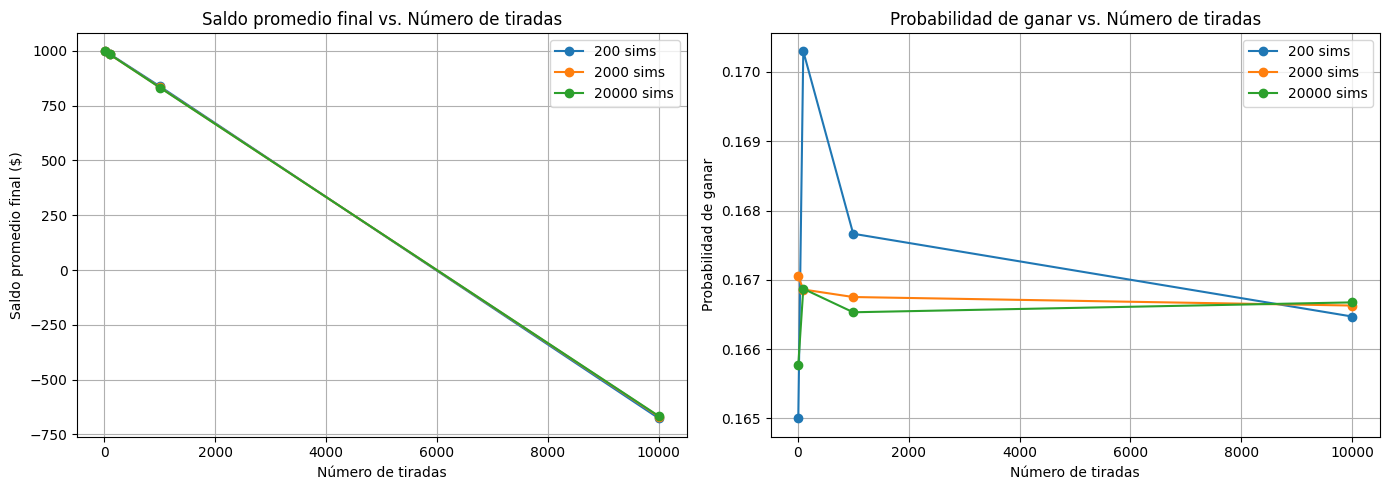

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Saldo promedio final vs. número de tiradas
for sims in sims_list:
    subset = df_results[df_results["num_simulations"] == sims]
    axs[0].plot(subset["max_num_rolls"], subset["end_balance"], marker='o', label=f"{sims} sims")
axs[0].set_title("Saldo promedio final vs. Número de tiradas")
axs[0].set_xlabel("Número de tiradas")
axs[0].set_ylabel("Saldo promedio final ($)")
axs[0].legend()
axs[0].grid(True)

# Gráfico 2: Probabilidad de ganar vs. Número de tiradas
for sims in sims_list:
    subset = df_results[df_results["num_simulations"] == sims]
    axs[1].plot(subset["max_num_rolls"], subset["win_probability"], marker='o', label=f"{sims} sims")
axs[1].set_title("Probabilidad de ganar vs. Número de tiradas")
axs[1].set_xlabel("Número de tiradas")
axs[1].set_ylabel("Probabilidad de ganar")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

**Observaciones:**


*   A medida que aumentas el número de tiradas por juego, el saldo promedio final disminuye de forma casi lineal, incluso llegando a perder dinero cuando se llega a 10,000 tiradas.
*  A mayor numero de tiradas de los juegos obtenemos la probabilidad de ganar mas cercana a lo esperado que es de 1/6.


#**Parte 2**

In [31]:
def roll_dice():
    return random.randint(1, 6) == random.randint(1, 6)

def simulate_game(num_simulations, max_num_rolls, bet, payout_multiplier, start_balance):
    win_probs = []
    final_balances = []

    for _ in range(num_simulations):
        balance = start_balance
        num_wins = 0

        for _ in range(max_num_rolls):
            if roll_dice():
                balance += (payout_multiplier * bet)
                num_wins += 1
            else:
                balance -= bet

        win_probs.append(num_wins / max_num_rolls)
        final_balances.append(balance)

    overall_win_prob = sum(win_probs) / num_simulations
    overall_end_balance = sum(final_balances) / num_simulations

    return overall_win_prob, overall_end_balance


In [33]:
num_simulations = 10000
max_num_rolls = 1000

# Versión original
orig_prob, orig_balance = simulate_game(
    num_simulations=num_simulations,
    max_num_rolls=max_num_rolls,
    bet=1,
    payout_multiplier=4,
    start_balance=1000
)

# Variante nueva (riesgosa)
alt_prob, alt_balance = simulate_game(
    num_simulations=num_simulations,
    max_num_rolls=max_num_rolls,
    bet=3,
    payout_multiplier=6,
    start_balance=800
)

# Variante nueva (mas riesgosa)
malt_prob, malt_balance = simulate_game(
    num_simulations=num_simulations,
    max_num_rolls=max_num_rolls,
    bet=6,
    payout_multiplier=6,
    start_balance=800
)

# Variante nueva (muy riesgosa)
mmalt_prob, mmalt_balance = simulate_game(
    num_simulations=num_simulations,
    max_num_rolls=max_num_rolls,
    bet=30,
    payout_multiplier=6,
    start_balance=800
)

# Mostrar resultados
print("=== Juego original ===")
print(f"Promedio de victorias: {orig_prob:.4f}")
print(f"Saldo promedio final: ${orig_balance:.2f}\n")

print("=== Variante de alto riesgo ===")
print(f"Promedio de victorias: {alt_prob:.4f}")
print(f"Saldo promedio final: ${alt_balance:.2f}")

print("=== Variante de más alto riesgo ===")
print(f"Promedio de victorias: {malt_prob:.4f}")
print(f"Saldo promedio final: ${malt_balance:.2f}")

print("=== Variante de muy alto riesgo ===")
print(f"Promedio de victorias: {mmalt_prob:.4f}")
print(f"Saldo promedio final: ${mmalt_balance:.2f}")

=== Juego original ===
Promedio de victorias: 0.1667
Saldo promedio final: $833.37

=== Variante de alto riesgo ===
Promedio de victorias: 0.1667
Saldo promedio final: $1301.38
=== Variante de más alto riesgo ===
Promedio de victorias: 0.1667
Saldo promedio final: $1802.79
=== Variante de muy alto riesgo ===
Promedio de victorias: 0.1666
Saldo promedio final: $5790.24


#**Parte 3**

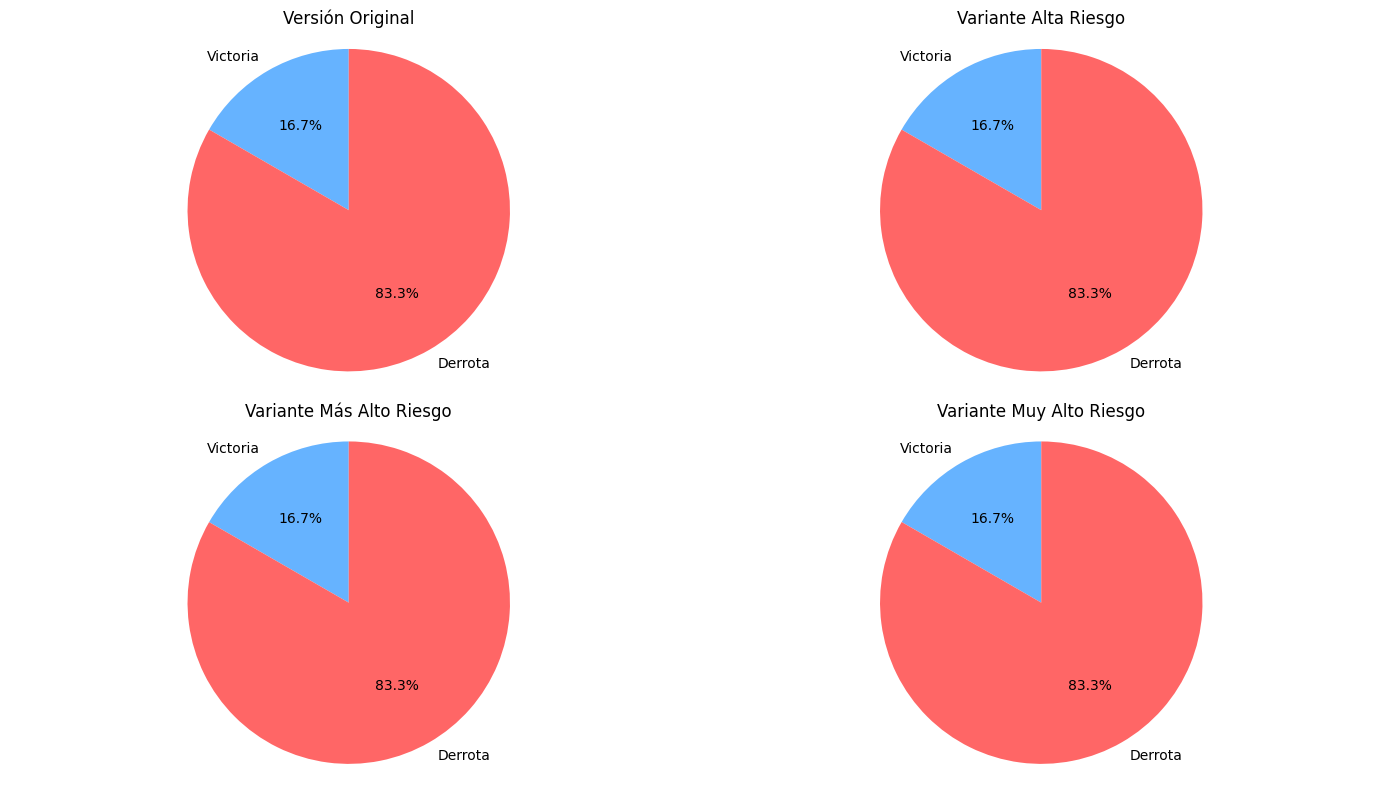

In [34]:
def plot_pie_chart(title, win_prob):
    labels = ['Victoria', 'Derrota']
    sizes = [win_prob * 100, (1 - win_prob) * 100]  # Convertir a porcentaje
    colors = ['#66b3ff', '#ff6666']

    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    plt.title(title)
    plt.axis('equal')  # Para que el gráfico sea circular

# Graficar las variantes
plt.figure(figsize=(14, 8))

# Versión original
plt.subplot(2, 2, 1)
plot_pie_chart('Versión Original', orig_prob)

# Variante de alto riesgo
plt.subplot(2, 2, 2)
plot_pie_chart('Variante Alta Riesgo', alt_prob)

# Variante de más alto riesgo
plt.subplot(2, 2, 3)
plot_pie_chart('Variante Más Alto Riesgo', malt_prob)

# Variante de muy alto riesgo
plt.subplot(2, 2, 4)
plot_pie_chart('Variante Muy Alto Riesgo', mmalt_prob)

plt.tight_layout()
plt.show()

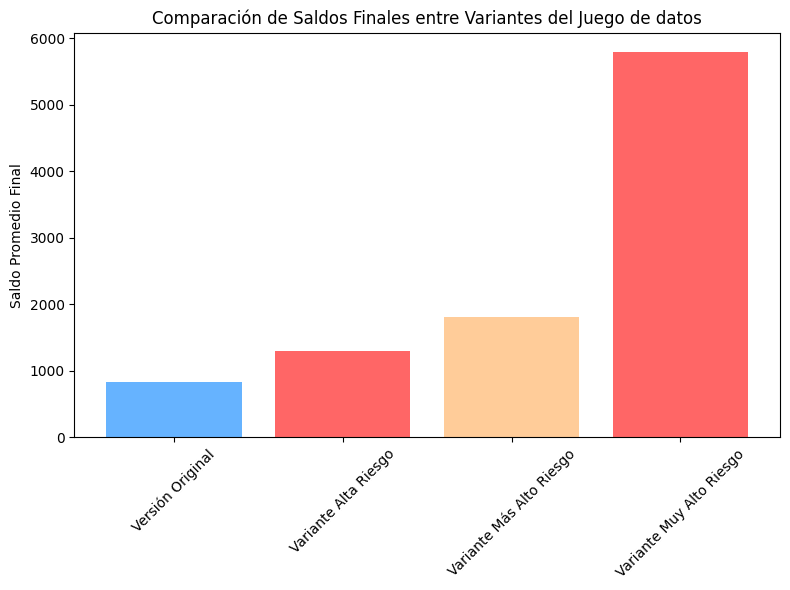

In [40]:
# Saldo final promedio de cada variante
balances = [orig_balance, alt_balance, malt_balance, mmalt_balance]
labels = ['Versión Original', 'Variante Alta Riesgo', 'Variante Más Alto Riesgo', 'Variante Muy Alto Riesgo']

# Graficar la comparación de saldos finales
plt.figure(figsize=(8, 6))
plt.bar(labels, balances, color=['#66b3ff', '#ff6666', '#ffcc99', '#ff6666'])
plt.title('Comparación de Saldos Finales entre Variantes del Juego de datos')
plt.ylabel('Saldo Promedio Final')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#**Observaciones**:



*   Lo que cambia realmente con las modificaciones de las reglas es el impacto de las victorias en el saldo final, no la probabilidad de ganar en sí.



